# Analyzing State Supermajorities


The data for this analysis comes from [Ballotpedia](https://ballotpedia.org/) and contains data that classifies states according to the degree of "monopoly" a political party has over the state's government. 

I encourage you to check out the analysis [here](https://ballotpedia.org/State_government_trifectas) which is where the data is source from. 

Ballotpedia classifies states in different types of **Trifectas**. Below is Ballotpedia's definition for `Trifectas`:

> State government trifecta is a term to describe single-party government, 
when one political party holds the governorship and majorities 
in both chambers of the state legislature. 


**Below I collect the dataset from Ballotpedia's website**

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_html('https://ballotpedia.org/State_government_trifectas')[4]
df.head()

Trifecta status by state                                                  \
                     State      Trifecta status Year of last status change   
0                  Alabama  Republican trifecta                       2011   
1                   Alaska   Divided government                       2015   
2                  Arizona  Republican trifecta                       2009   
3                 Arkansas  Republican trifecta                       2015   
4               California  Democratic trifecta                       2011   

                      
  Unnamed: 3_level_1  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

**Next I...**
- Drop unecessary columns
- Add a column that counts the number years since the status of the state's trifecta has changed

In [2]:
df.columns = df.columns.droplevel().str.lower().str.replace(' ', '_')
df = df[[x for x in df.columns if 'unnamed' not in x]]
df = df.assign(years_with_trifecta=datetime.now().year - df.year_of_last_status_change.astype(int))
display(df.head())

,state,trifecta_status,year_of_last_status_change,years_with_trifecta
0,Alabama,Republican trifecta,2011,11
1,Alaska,Divided government,2015,7
2,Arizona,Republican trifecta,2009,13
3,Arkansas,Republican trifecta,2015,7
4,California,Democratic trifecta,2011,11


**Next I filter out states with a "Diveded government" status because they different bodies of the state government are controlled by different political parties**

In [3]:
df = df.query('~trifecta_status.str.contains("Divided")')

### How many states have a current trifecta?

In [4]:
print('States with trifecta:', df.shape[0])

States with trifecta: 37


### How long on average have states held their current trifectas?

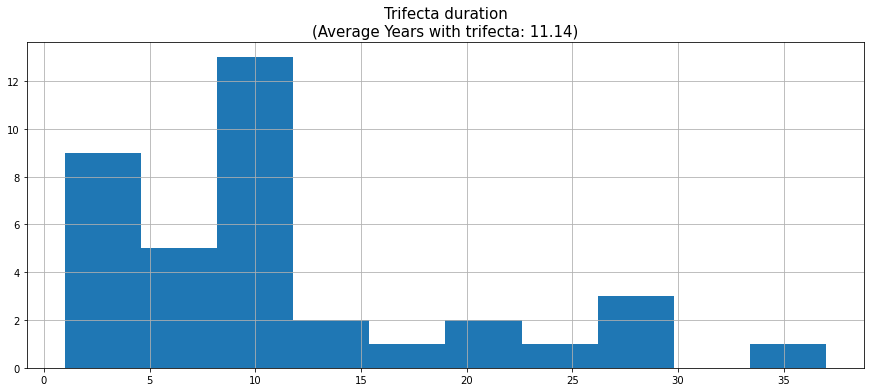

In [5]:
average_years_trifecta = round(df.years_with_trifecta.mean(), 2)
df.years_with_trifecta.hist(figsize=(15,6))
plt.title(f'Trifecta duration\n(Average Years with trifecta: {average_years_trifecta})', fontsize=15);

### How many trifecta does each party have?

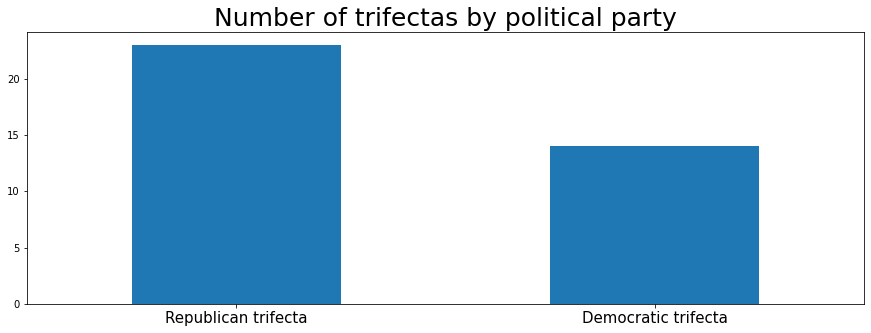

In [6]:
df.trifecta_status.value_counts().plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=0, fontsize=15)
plt.title('Number of trifectas by political party', fontsize=25);

### What is the average amount of years each party has held their trifecta?

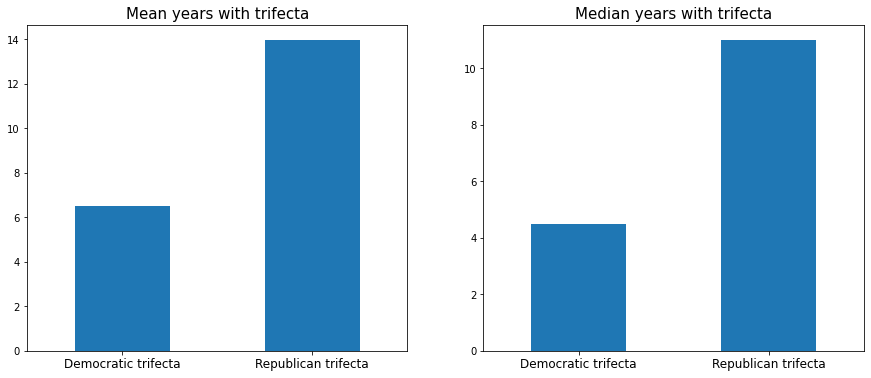

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

df.groupby('trifecta_status').years_with_trifecta.mean().plot(kind='bar', ax=ax[0])
for label in ax[0].get_xticklabels():
    label.set_rotation(0)
    label.set_fontsize(12)
    
df.groupby('trifecta_status').years_with_trifecta.median().plot(kind='bar', ax=ax[1])
for label in ax[1].get_xticklabels():
    label.set_rotation(0)
    label.set_fontsize(12)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_title('Mean years with trifecta', fontsize=15)
ax[1].set_title('Median years with trifecta', fontsize=15);